# Param search results

In [27]:
%reset -f
%matplotlib inline
from db import make_session, d_models

GROUP = 'test_5'

session = make_session()
rslts = session.query(d_models.SmlnRslt).filter_by(group=GROUP).order_by(
    d_models.SmlnRslt.success.desc()).limit(10)
session.close()

for rslt in rslts:
    print('ID: {}, SUCCESS: {},\nMETRICS: {}\n'.format(rslt.id, rslt.success, rslt.metrics))

ID: 233, SUCCESS: True,
METRICS: {'avg_spk_ct_trj': 1.8525469168900803, 'frac_spk_trj': 0.9920212765957447, 'frac_spk_non_trj': 0.3573717948717949, 'success': True}

ID: 194, SUCCESS: False,
METRICS: {'avg_spk_ct_trj': 1.0, 'frac_spk_trj': 0.10638297872340426, 'frac_spk_non_trj': 0.017628205128205128, 'success': False}

ID: 199, SUCCESS: False,
METRICS: {'avg_spk_ct_trj': 1.0666666666666667, 'frac_spk_trj': 0.5585106382978723, 'frac_spk_non_trj': 0.017628205128205128, 'success': False}

ID: 196, SUCCESS: False,
METRICS: {'avg_spk_ct_trj': 1.1181434599156117, 'frac_spk_trj': 0.6303191489361702, 'frac_spk_non_trj': 0.017628205128205128, 'success': False}

ID: 197, SUCCESS: False,
METRICS: {'avg_spk_ct_trj': 1.0413223140495869, 'frac_spk_trj': 0.32180851063829785, 'frac_spk_non_trj': 0.017628205128205128, 'success': False}

ID: 198, SUCCESS: False,
METRICS: {'avg_spk_ct_trj': 1.0765027322404372, 'frac_spk_trj': 0.4867021276595745, 'frac_spk_non_trj': 0.017628205128205128, 'success': False

# Simulation verification

In [24]:
%reset -f
%matplotlib inline
from db import make_session, d_models
from seq_replay import plot, smln

SMLN_RSLT_ID = 233

session = make_session()
smln_rslt = session.query(d_models.SmlnRslt).get(SMLN_RSLT_ID)
session.close()

p = smln_rslt.params
s_params = smln_rslt.s_params
apxn = smln_rslt.apxn

print('Running smln...')
rslt = smln.run(p, s_params, apxn)
print('Smln complete.')

Running smln...
Smln complete.


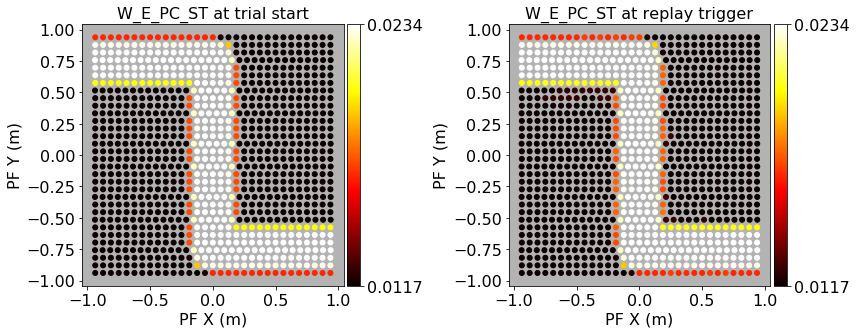

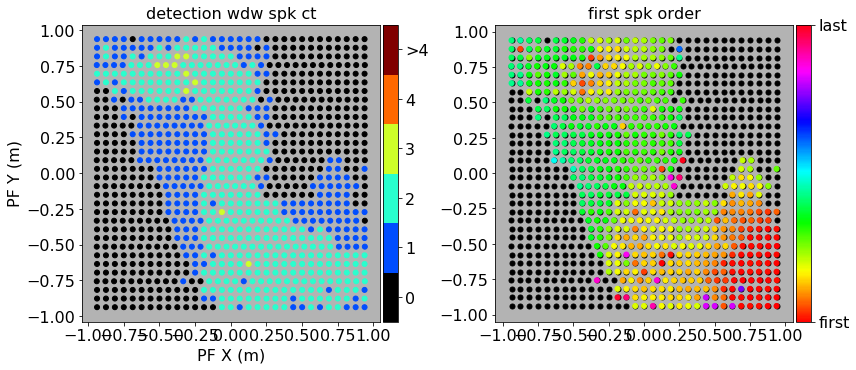

In [25]:
# make plot
plot.heat_maps(rslt);

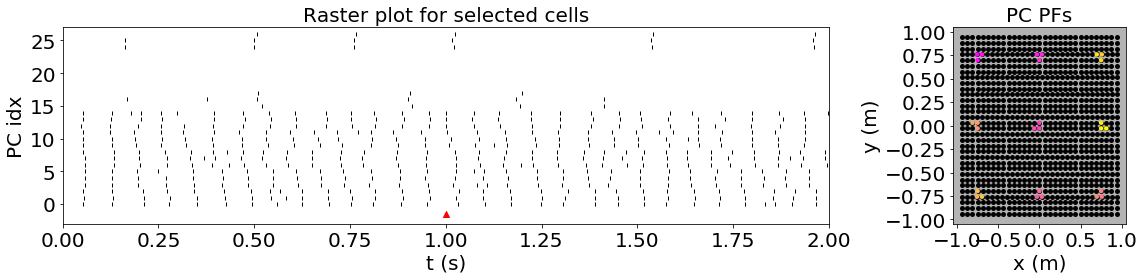

In [26]:
plot.raster(
    rslt,
    xys=[
    (-.75, .75), (0, .75), (0, 0), (0, -.75), (.75, -.75),  # trj
    (-.75, 0), (-.75, -.75), (.75, .75), (.75, 0),  # non-trj
    ],
    nearest=3,
    epoch='replay');